In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_data = pd.read_csv('/Users/hsinyu/Desktop/ML/Kaggle/House_Prices/home-data-for-ml-course/train.csv')
test_data = pd.read_csv('/Users/hsinyu/Desktop/ML/Kaggle/House_Prices/home-data-for-ml-course/test.csv')
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']


In [3]:
# 刪除id
X = X.drop(columns=['Id'])

# 刪除包含過半 NaN 的列
threshold = 0.5 
X = X.dropna(axis=1, thresh=int(threshold * X.shape[0]))

numeric_features = X.select_dtypes(include='number')
cat_features = X.select_dtypes(include='object')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

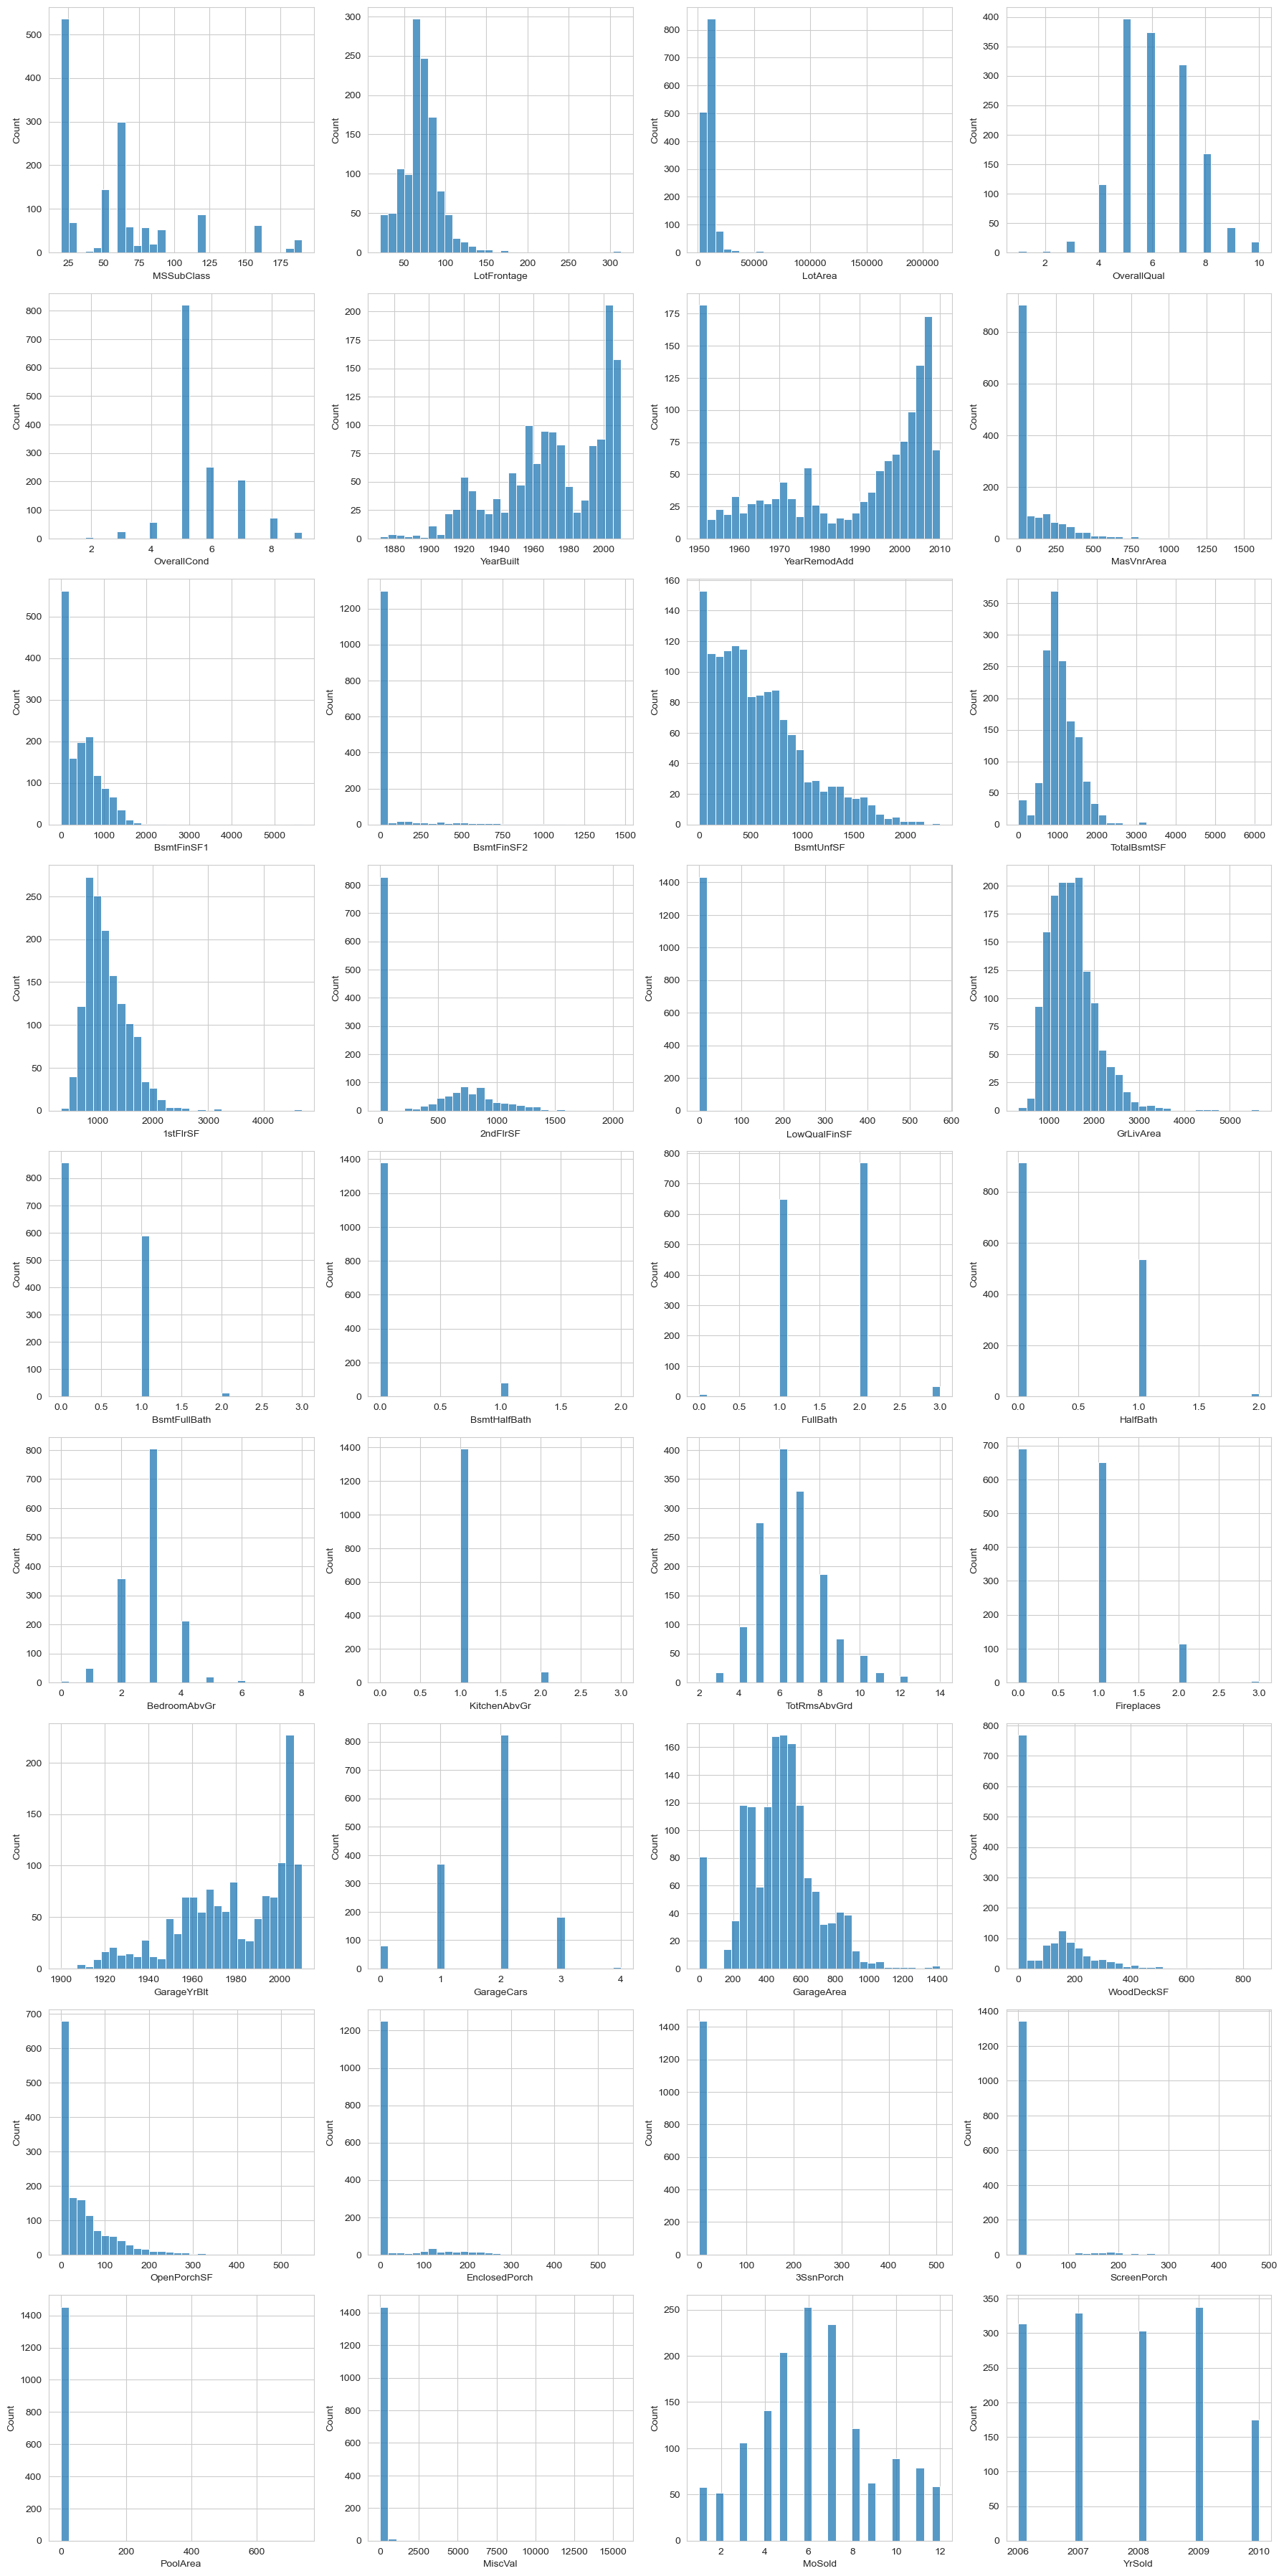

In [110]:
n_rows = math.ceil(len(numeric_features.columns) / 4)  # 每行最多 4 張圖

sns.set_style('whitegrid')

fig = plt.figure(figsize=(18, n_rows * 4))  

for index, feature in enumerate(numeric_features.columns):
    plt.subplot(n_rows, 4, index + 1)  
    sns.histplot(numeric_features[feature], kde=False, bins=30)  

fig.tight_layout(pad=1.0)
plt.show()


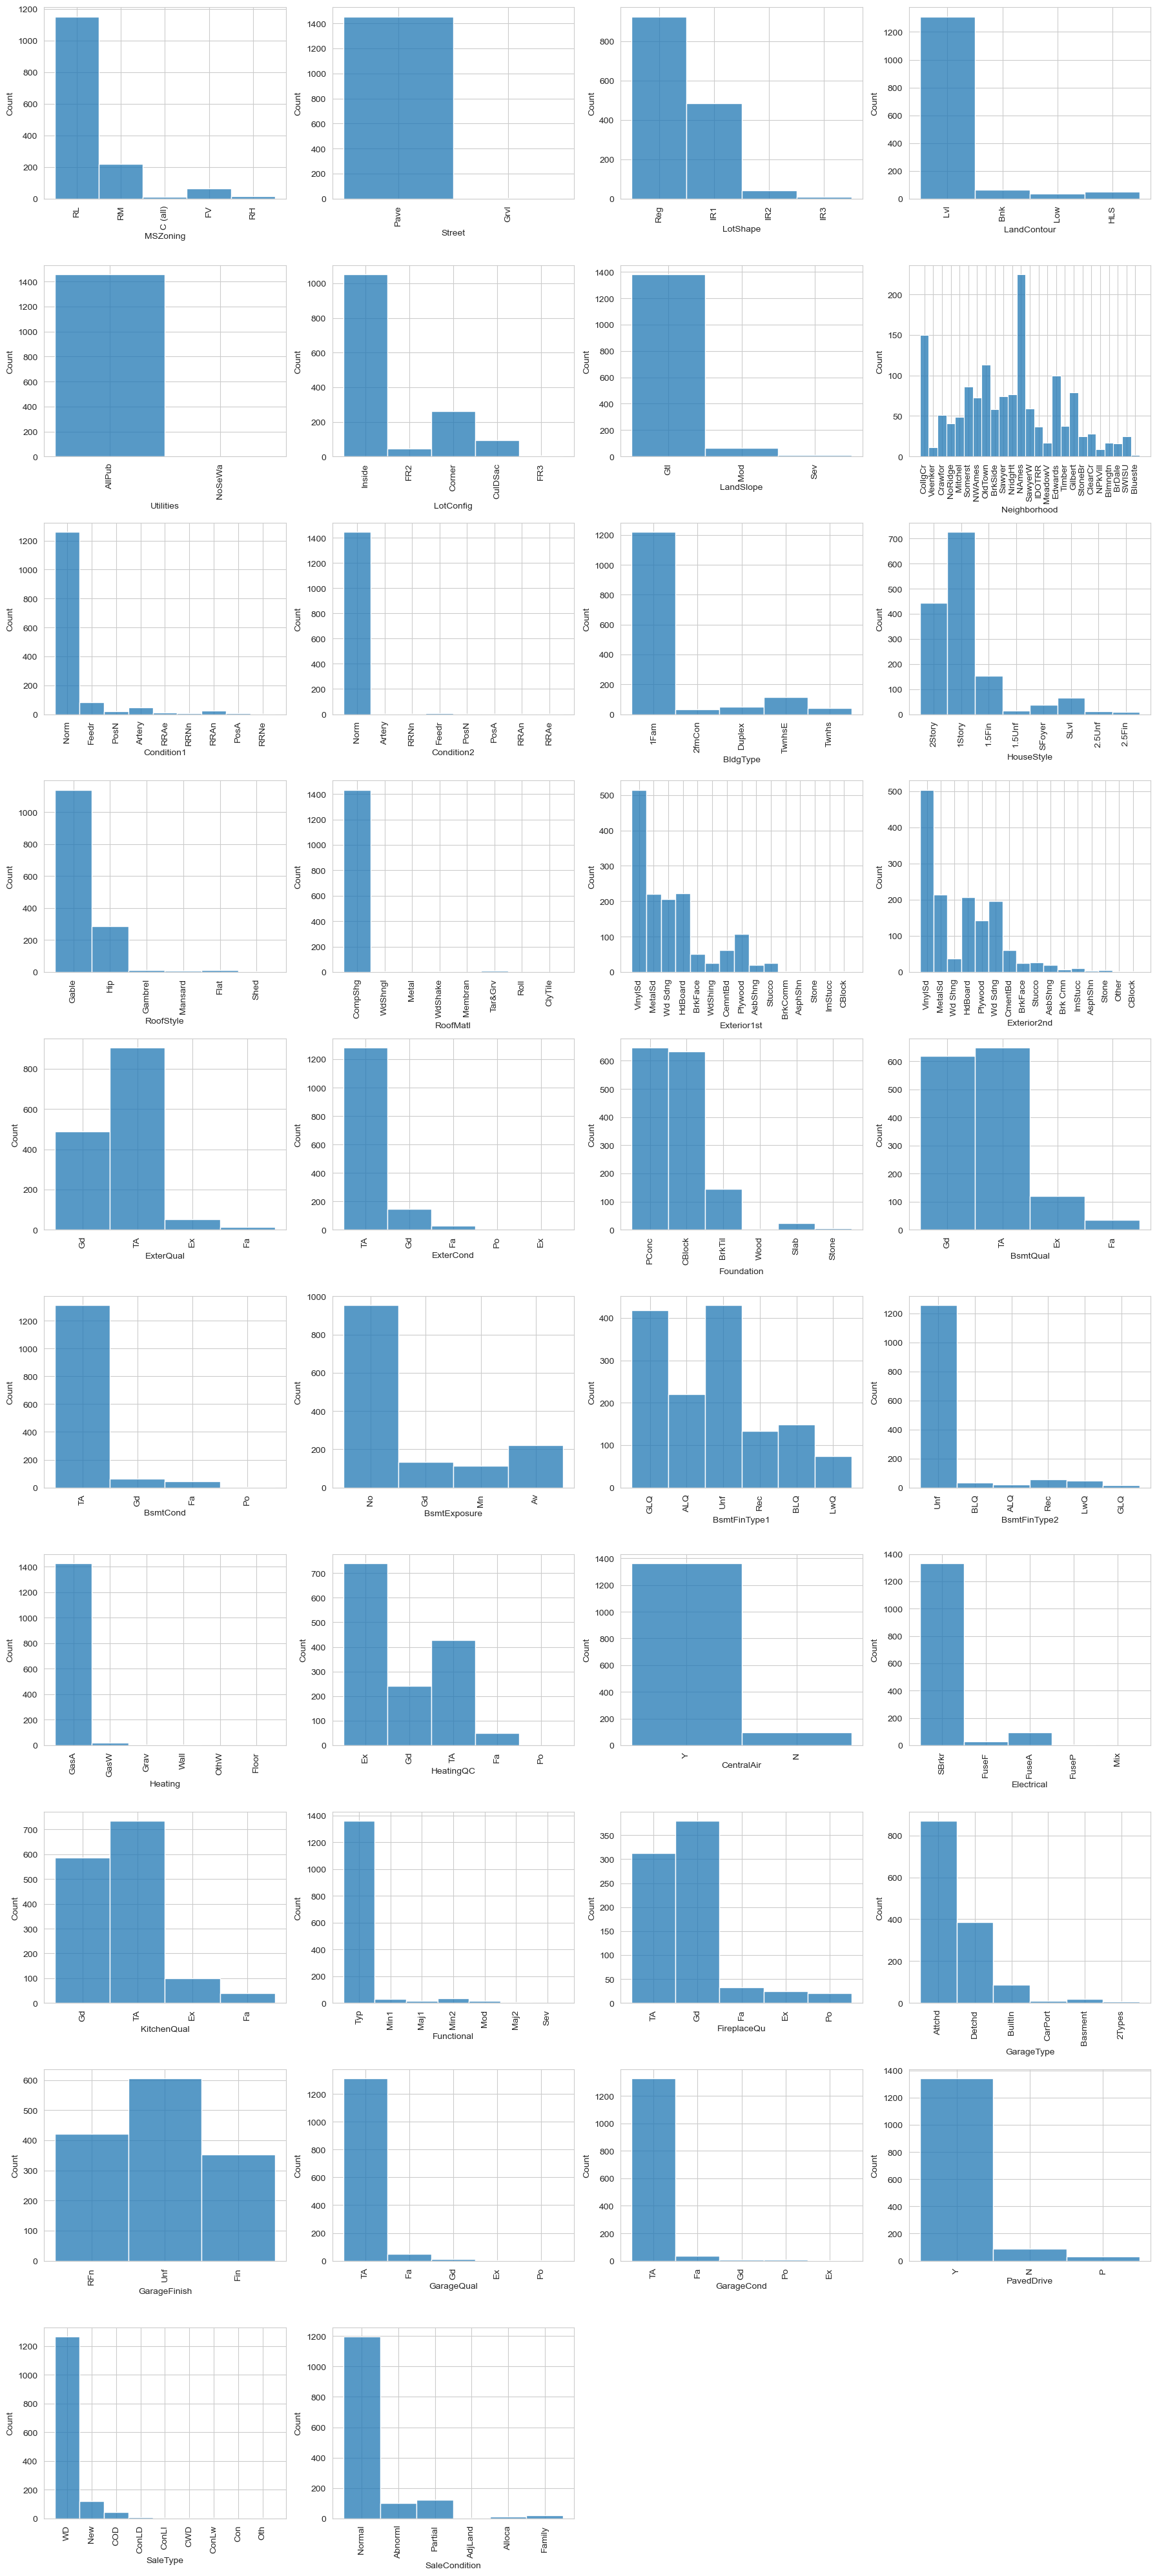

In [144]:
n_rows = math.ceil(len(cat_features.columns) / 4)  # 每行最多 4 張圖

sns.set_style('whitegrid')

fig = plt.figure(figsize=(18, n_rows * 4))  

for index, feature in enumerate(cat_features.columns):
    plt.subplot(n_rows, 4, index + 1)  
    sns.histplot(cat_features[feature], kde=False, bins=10)
    plt.xticks(rotation=90)

fig.tight_layout(pad=1.0)
plt.show()

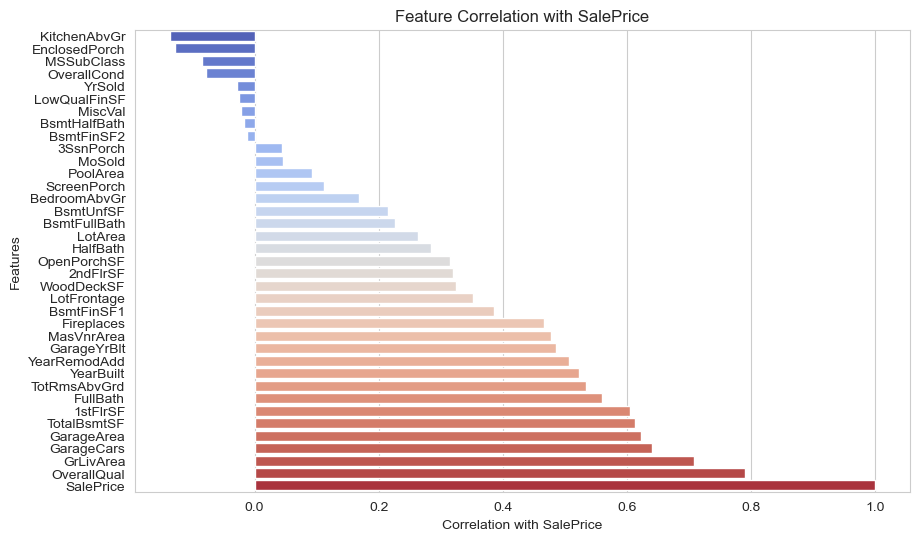

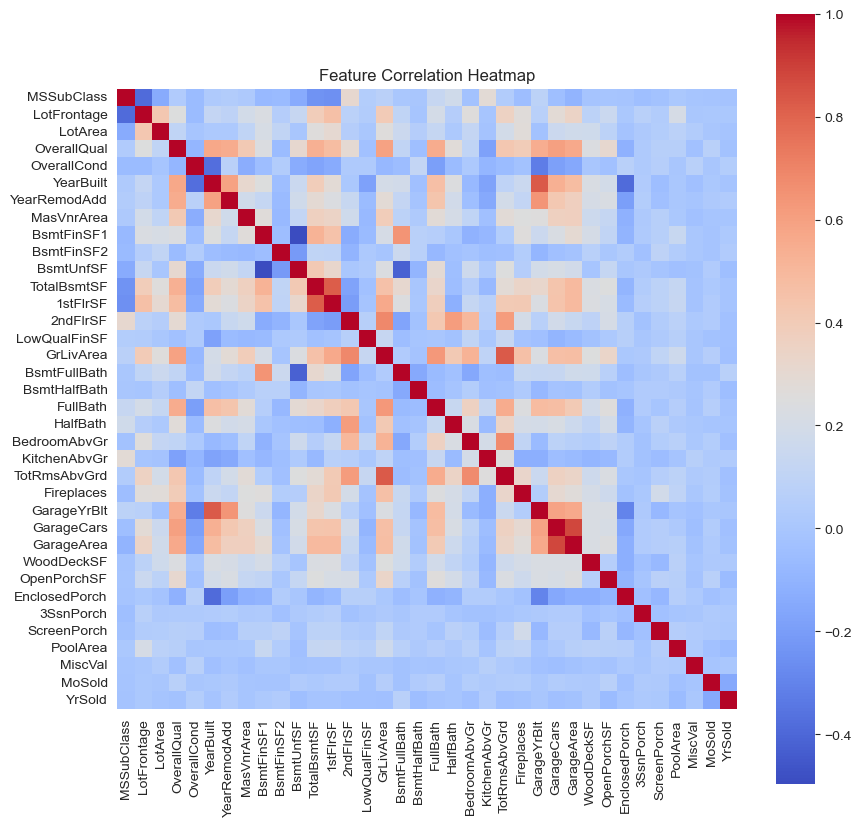

In [112]:
# 所有feature和 sale price 之間的相關性
# 計算相關係數
df_combined = pd.concat([numeric_features, y], axis=1)
correlation = df_combined.corr()['SalePrice'].dropna().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette="coolwarm", legend=False)
plt.xlabel("Correlation with SalePrice")
plt.ylabel("Features")
plt.title("Feature Correlation with SalePrice")
plt.show()



# 計算feature之間的相關性矩陣
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# 對非數值資料進行編碼(轉換成數值) Labelencoder
labelencoder_X = LabelEncoder()
for column in cat_features.columns:
    cat_features[column] = labelencoder_X.fit_transform(cat_features[column])
    
# 1、LotFrontage, MasVnrArea, GarageYrBlt(數值型) 使用中位數代替缺失值
imputer = SimpleImputer(strategy='median')
numeric_features[:] = imputer.fit_transform(numeric_features)
numeric_features = pd.DataFrame(numeric_features, columns=numeric_features.columns)
X = pd.concat([cat_features, numeric_features], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


In [169]:
X_scaled

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.045532,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.045532,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-0.707186,-0.036289,-0.03174,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,0.290872,-0.036289,-0.03174,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.039872,-0.036289,-0.03174,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-0.041814,-0.036289,-0.03174,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [7]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

def MLmodels(x_train, y_train):

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)

    # Ridge Regression (L2 Regularization)
    ridge = Ridge(alpha=1.0)
    ridge.fit(x_train, y_train)

    # Lasso Regression (L1 Regularization)
    lasso = Lasso(alpha=0.01, max_iter=5000)
    lasso.fit(x_train, y_train)

    # Support Vector Regression (SVR)
    svr = SVR(kernel='linear')
    svr.fit(x_train, y_train)

    # K-Nearest Neighbors Regression
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(x_train, y_train)

    # Decision Tree Regressor
    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)

    # Random Forest Regressor
    forest = RandomForestRegressor(n_estimators=100, random_state=42)
    forest.fit(x_train, y_train)

    # XGBoost Regressor
    xgboost = XGBRegressor(n_estimators=100, random_state=42)
    xgboost.fit(x_train, y_train)

    # Neural Network (MLP Regressor)
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=2000, random_state=42)
    mlp.fit(x_train, y_train)

    # Print training accuracy (R^2 Score)
    print('1. Linear Regression R^2:', lin_reg.score(x_train, y_train))
    print('2. Ridge Regression R^2:', ridge.score(x_train, y_train))
    print('3. Lasso Regression R^2:', lasso.score(x_train, y_train))
    print('4. Support Vector Regression R^2:', svr.score(x_train, y_train))
    print('5. K-Nearest Neighbors R^2:', knn.score(x_train, y_train))
    print('6. Decision Tree R^2:', tree.score(x_train, y_train))
    print('7. Random Forest R^2:', forest.score(x_train, y_train))
    print('8. XGBoost R^2:', xgboost.score(x_train, y_train))
    print('9. Neural Network R^2:', mlp.score(x_train, y_train))

    return lin_reg, ridge, lasso, svr, knn, tree, forest, xgboost, mlp


In [10]:
# Split the data into independent 'X' and dependent 'y' variables
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = MLmodels(X_train, y_train)

/Users/hsinyu/anaconda3/envs/demo/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.801e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


1. Linear Regression R^2: 0.8457788925429164
2. Ridge Regression R^2: 0.8457462926520759
3. Lasso Regression R^2: 0.8457466667086599
4. Support Vector Regression R^2: 0.14524158406617682
5. K-Nearest Neighbors R^2: 0.8266922857021501
6. Decision Tree R^2: 1.0
7. Random Forest R^2: 0.980036842096823
8. XGBoost R^2: 0.9997729063034058
9. Neural Network R^2: 0.9219460440879022


/Users/hsinyu/anaconda3/envs/demo/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [218]:
# preprocessing test data
test_df = test_data.drop(columns=['Id'])

# 刪除包含過半 NaN 的列
threshold = 0.5 
test_df = test_df.dropna(axis=1, thresh=int(threshold * test_df.shape[0]))

numeric_features_test = test_df.select_dtypes(include='number')
cat_features_test = test_df.select_dtypes(include='object')

# 對非數值資料進行編碼(轉換成數值) Labelencoder
labelencoder_X = LabelEncoder()
for column in cat_features_test.columns:
    cat_features_test[column] = labelencoder_X.fit_transform(cat_features_test[column])
    
# 1、LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF,
#    BsmtFullBath, BsmtHalfBath, GarageYrBlt, GarageCars, GarageArea(數值型) 使用中位數代替缺失值
imputer = SimpleImputer(strategy='median')
numeric_features_test[:] = imputer.fit_transform(numeric_features_test)
numeric_features_test = pd.DataFrame(numeric_features_test, columns=numeric_features_test.columns)
X_test = pd.concat([cat_features_test, numeric_features_test], axis=1)

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(X_test)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns, index=X_test.index)


# Decision Tree
test_pred = model[6].predict(X_scaled_test)
DecisionTree_test = pd.DataFrame({
    "Id": test_data.iloc[:, 0].values,
    "SalePrice": test_pred                     # 預測值
})
DecisionTree_test.to_csv('/Users/hsinyu/Desktop/ML/Kaggle/House_Prices/home-data-for-ml-course/DecisionTree_test_pred.csv', index=False)


# Random Forest
test_pred = model[6].predict(X_scaled_test)
RandomForest_test = pd.DataFrame({
    "Id": test_data.iloc[:, 0].values,
    "SalePrice": test_pred                     # 預測值
})
RandomForest_test.to_csv('/Users/hsinyu/Desktop/ML/Kaggle/House_Prices/home-data-for-ml-course/RandomForest_test_pred.csv', index=False)

# XGBoost
test_pred = model[7].predict(X_scaled_test)
XGBoost_test = pd.DataFrame({
    "Id": test_data.iloc[:, 0].values,
    "SalePrice": test_pred                     # 預測值
})
XGBoost_test.to_csv('/Users/hsinyu/Desktop/ML/Kaggle/House_Prices/home-data-for-ml-course/XGBoost_test_pred.csv', index=False)


## RMSE(計算預測誤差) 來評估模型效能

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np


# 建立三種模型
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# 記錄 RMSE 結果
rmse_scores = {}

for name, model in models.items():
    # 訓練模型
    model.fit(X_train, y_train)
    # 進行預測
    y_pred = model.predict(X_test)
    # 計算 RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

# 找出 RMSE 最小的模型
best_model = min(rmse_scores, key=rmse_scores.get)
print(f"\n最佳模型為：{best_model}，其 RMSE 為 {rmse_scores[best_model]:.4f}")


Decision Tree RMSE: 40164.1632
Random Forest RMSE: 28137.4949
XGBoost RMSE: 26583.8023

最佳模型為：XGBoost，其 RMSE 為 26583.8023
